In [1]:
import matplotlib.pyplot as plt
import numpy as np
# default parameters of the plot layout
plt.rcParams["text.usetex"] = True  # use latex
plt.rcParams["font.size"] = 13
plt.rcParams["figure.dpi"] = 300
plt.rcParams["figure.constrained_layout.use"] = True

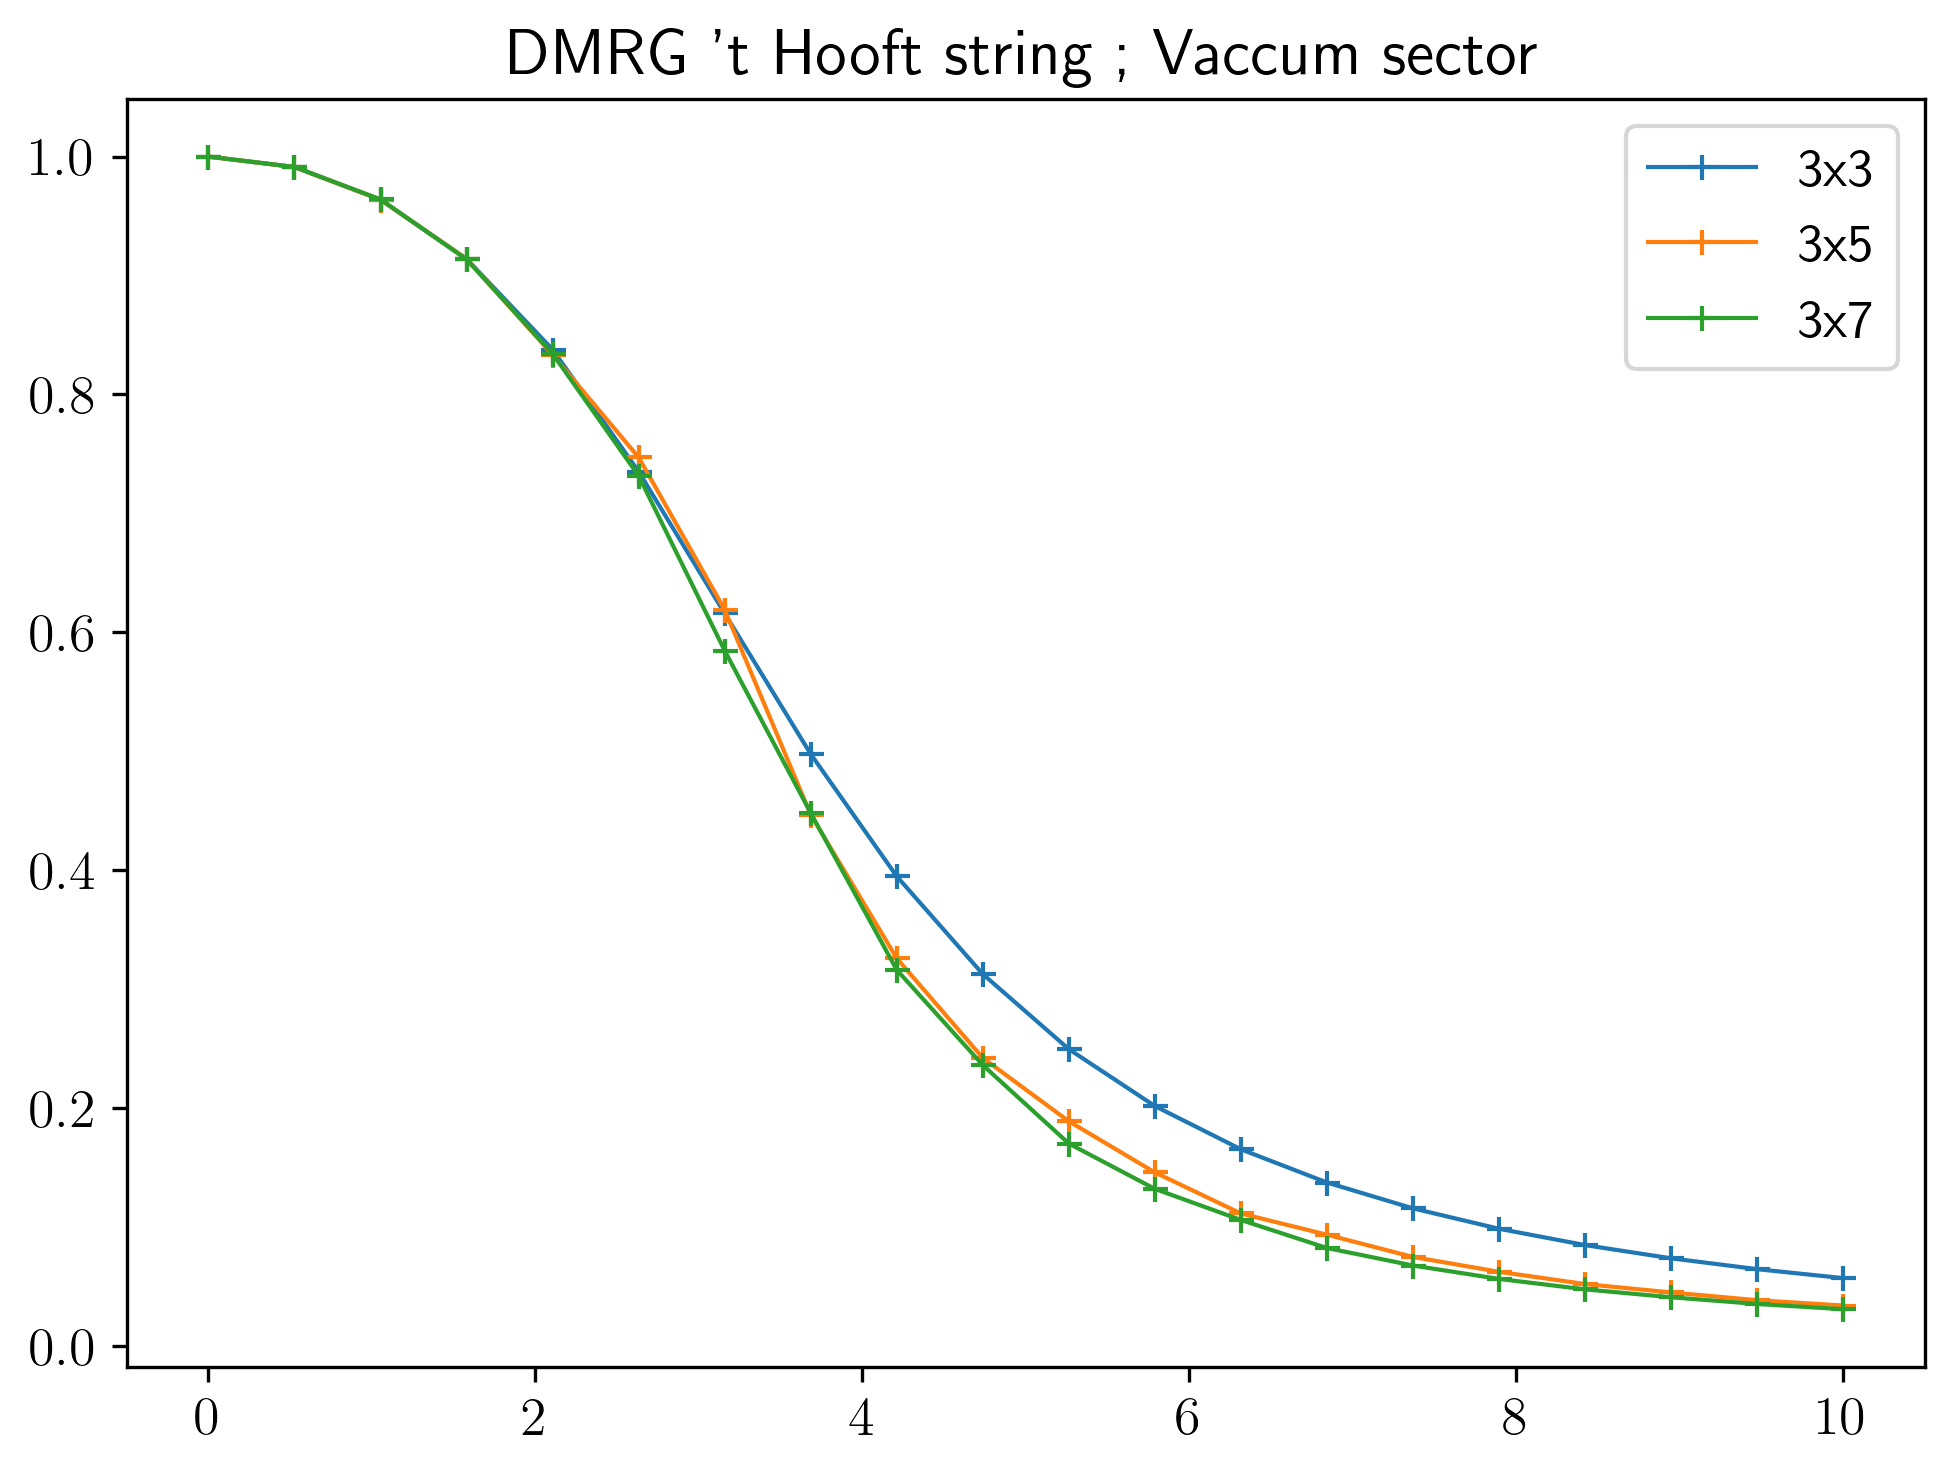

In [2]:
Ls = [3,5,7]
chis = [8,16,32]
ss = [1,2,3]
plt.title("DMRG 't Hooft string ; Vaccum sector")
hs = np.linspace(0,10,20)
for L, chi, s in zip(Ls, chis, ss):
    string = np.load(f"/Users/fradm98/Library/CloudStorage/GoogleDrive-fra.di.marcantonio@gmail.com/My Drive/projects/1_Z2/results/thooft/thooft_string_{s}-1_horizontal_Z2_dual_direct_lattice_3x{L}_vacuum_sector_None-None_h_0.0-10.0_delta_20_chi_{chi}.npy")
    plt.plot(hs, string, '+-', linewidth=1, label=f"3x{L}")

plt.legend()
plt.show()

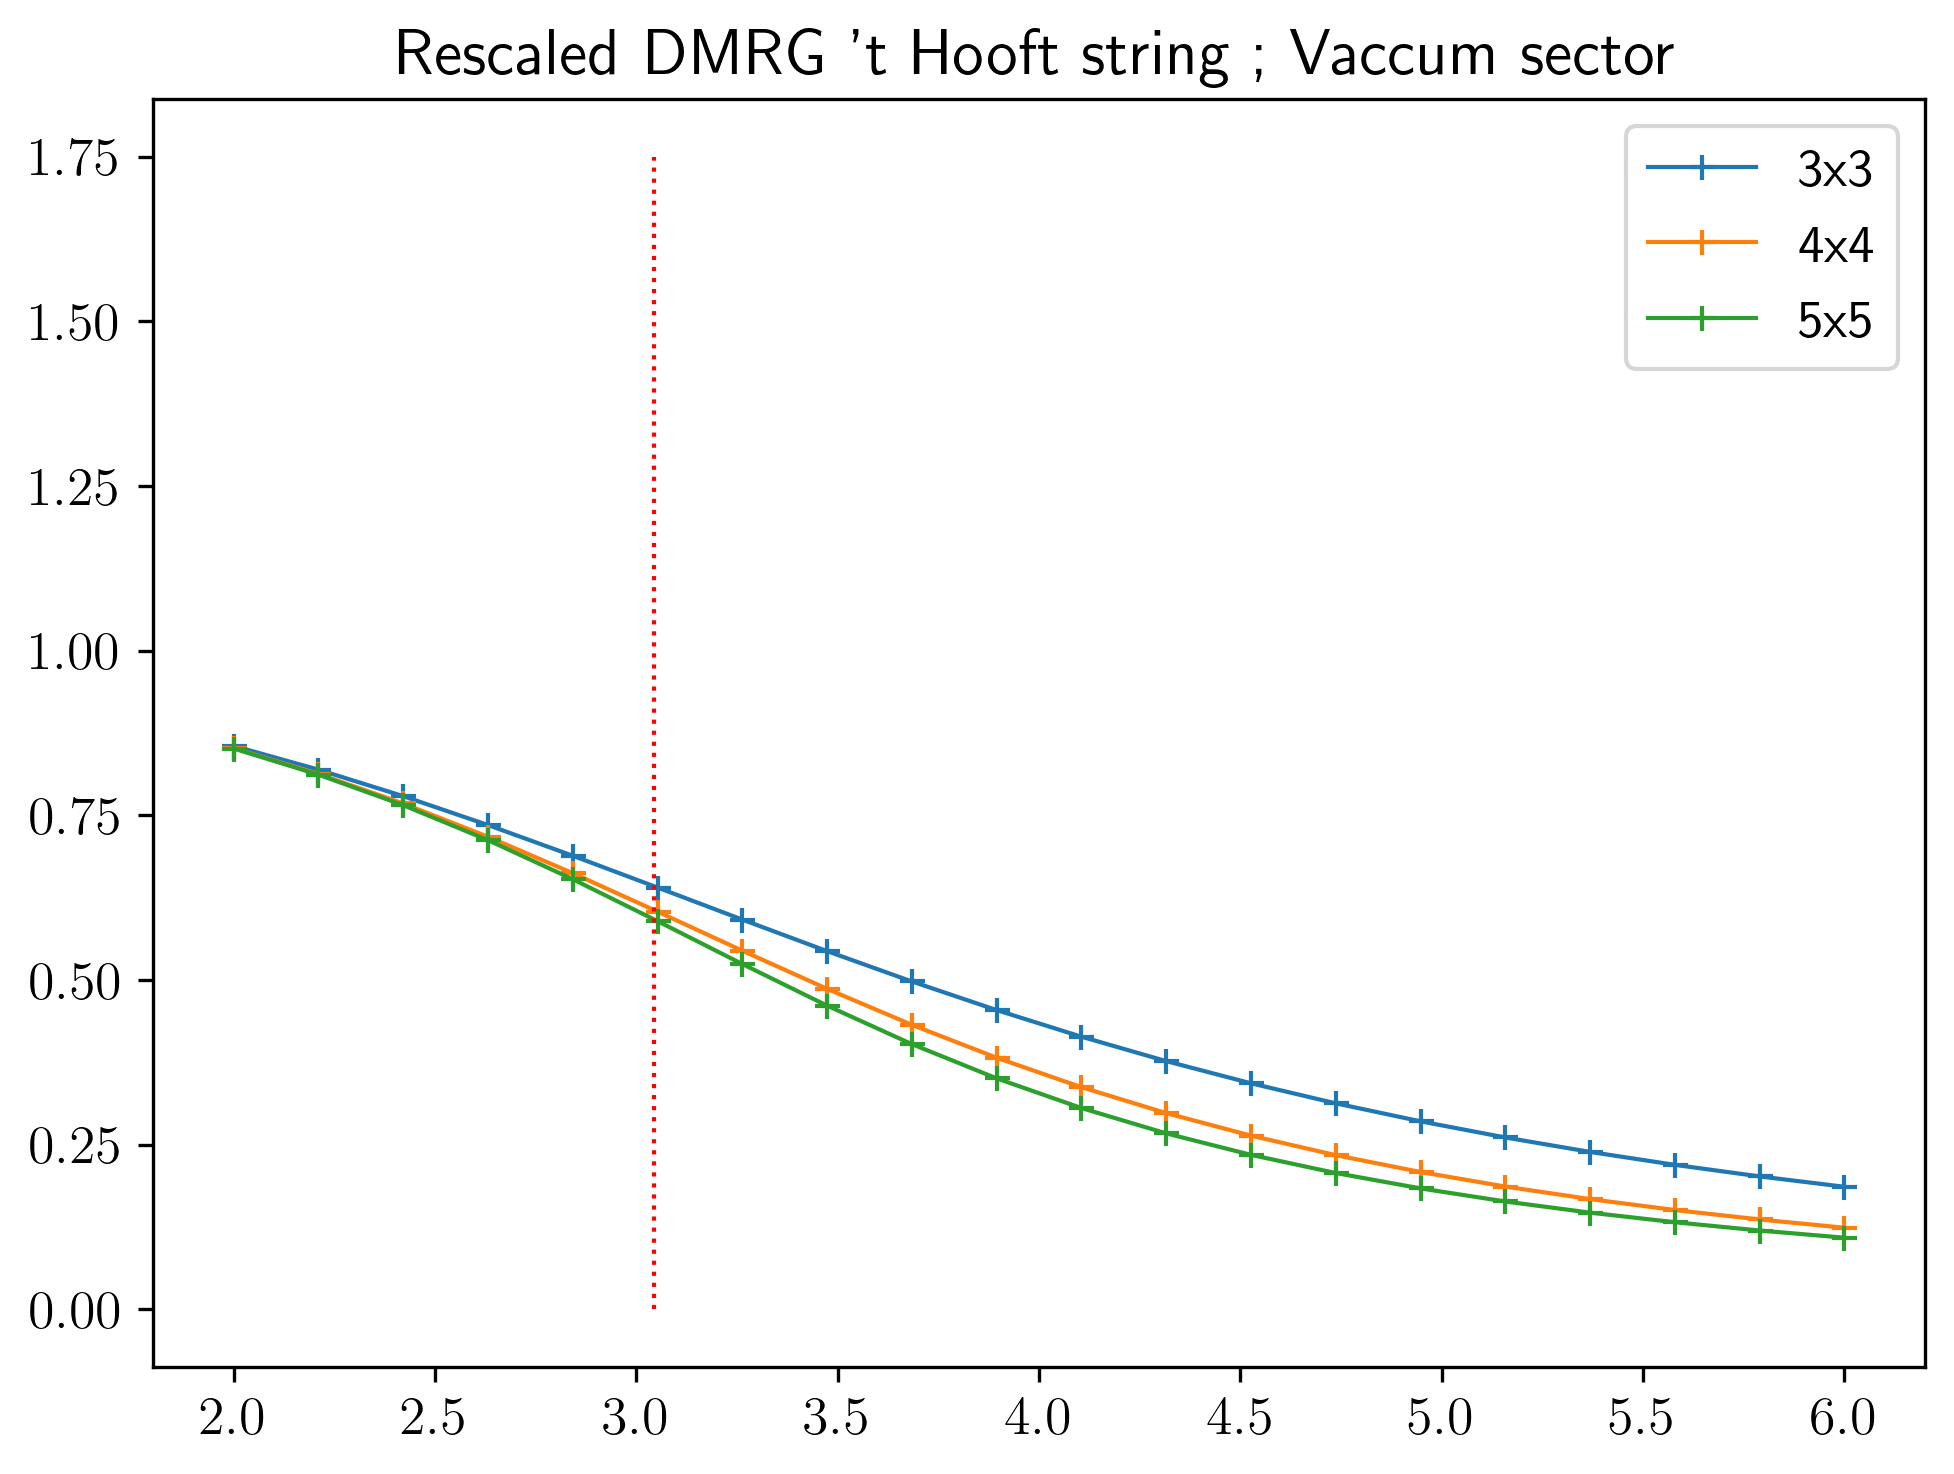

In [16]:
Ls = [3, 4, 5]
chis = [8,64,128]
ss = [1,1,1]
plt.title("Rescaled DMRG 't Hooft string ; Vaccum sector")
hs = np.linspace(2,6,20)
for L, chi, s in zip(Ls, chis, ss):
    string = np.load(f"/Users/fradm98/Library/CloudStorage/GoogleDrive-fra.di.marcantonio@gmail.com/My Drive/projects/1_Z2/results/thooft/thooft_string_first_moment_{s}-1_horizontal_Z2_dual_direct_lattice_{L}x{L}_vacuum_sector_None-None_h_2.0-6.0_delta_20_chi_{chi}.npy")
    string2 = np.load(f"/Users/fradm98/Library/CloudStorage/GoogleDrive-fra.di.marcantonio@gmail.com/My Drive/projects/1_Z2/results/thooft/thooft_string_second_moment_{s}-1_horizontal_Z2_dual_direct_lattice_{L}x{L}_vacuum_sector_None-None_h_2.0-6.0_delta_20_chi_{chi}.npy")
    plt.plot(hs, string, '+-', linewidth=1, label=f"{L}x{L}") # (L**(-0.326419/0.629971))*
    # plt.plot(hs, (L**(4))*np.abs(string2 - string**2), '+-', linewidth=1, label=f"{L}x{L}")

# L = 6
# chi = 256
# s = 1
# string = np.load(f"/Users/fradm98/Library/CloudStorage/GoogleDrive-fra.di.marcantonio@gmail.com/My Drive/projects/1_Z2/results/thooft/thooft_string_first_moment_{s}-1_horizontal_Z2_dual_direct_lattice_{L}x{L}_vacuum_sector_None-None_h_2.0-6.0_delta_50_chi_{chi}.npy")
# hs = np.linspace(2,6,50)

# plt.plot(hs, np.sqrt(string2), '+-', linewidth=1, label=f"{L}x{L}") # (L**(-0.326419/0.629971))*
plt.vlines(x=3.044, ymin=0, ymax=1.75, linestyles=':', colors='r', linewidth=1)
plt.legend()
plt.show()

In [11]:
print(string2)

[18.87435048 17.51196511 16.03357405 14.46648006 12.85588108 11.26528897
  9.76639861  8.41998008  7.25985086  6.29029504  5.4948404   4.8476096
  4.32148652  3.89221015  3.53969041  3.24793208  3.00443671  2.79950705
  2.6256215   2.47692486]


[]
[]


ValueError: x and y must have same first dimension, but have shapes (20,) and (0,)

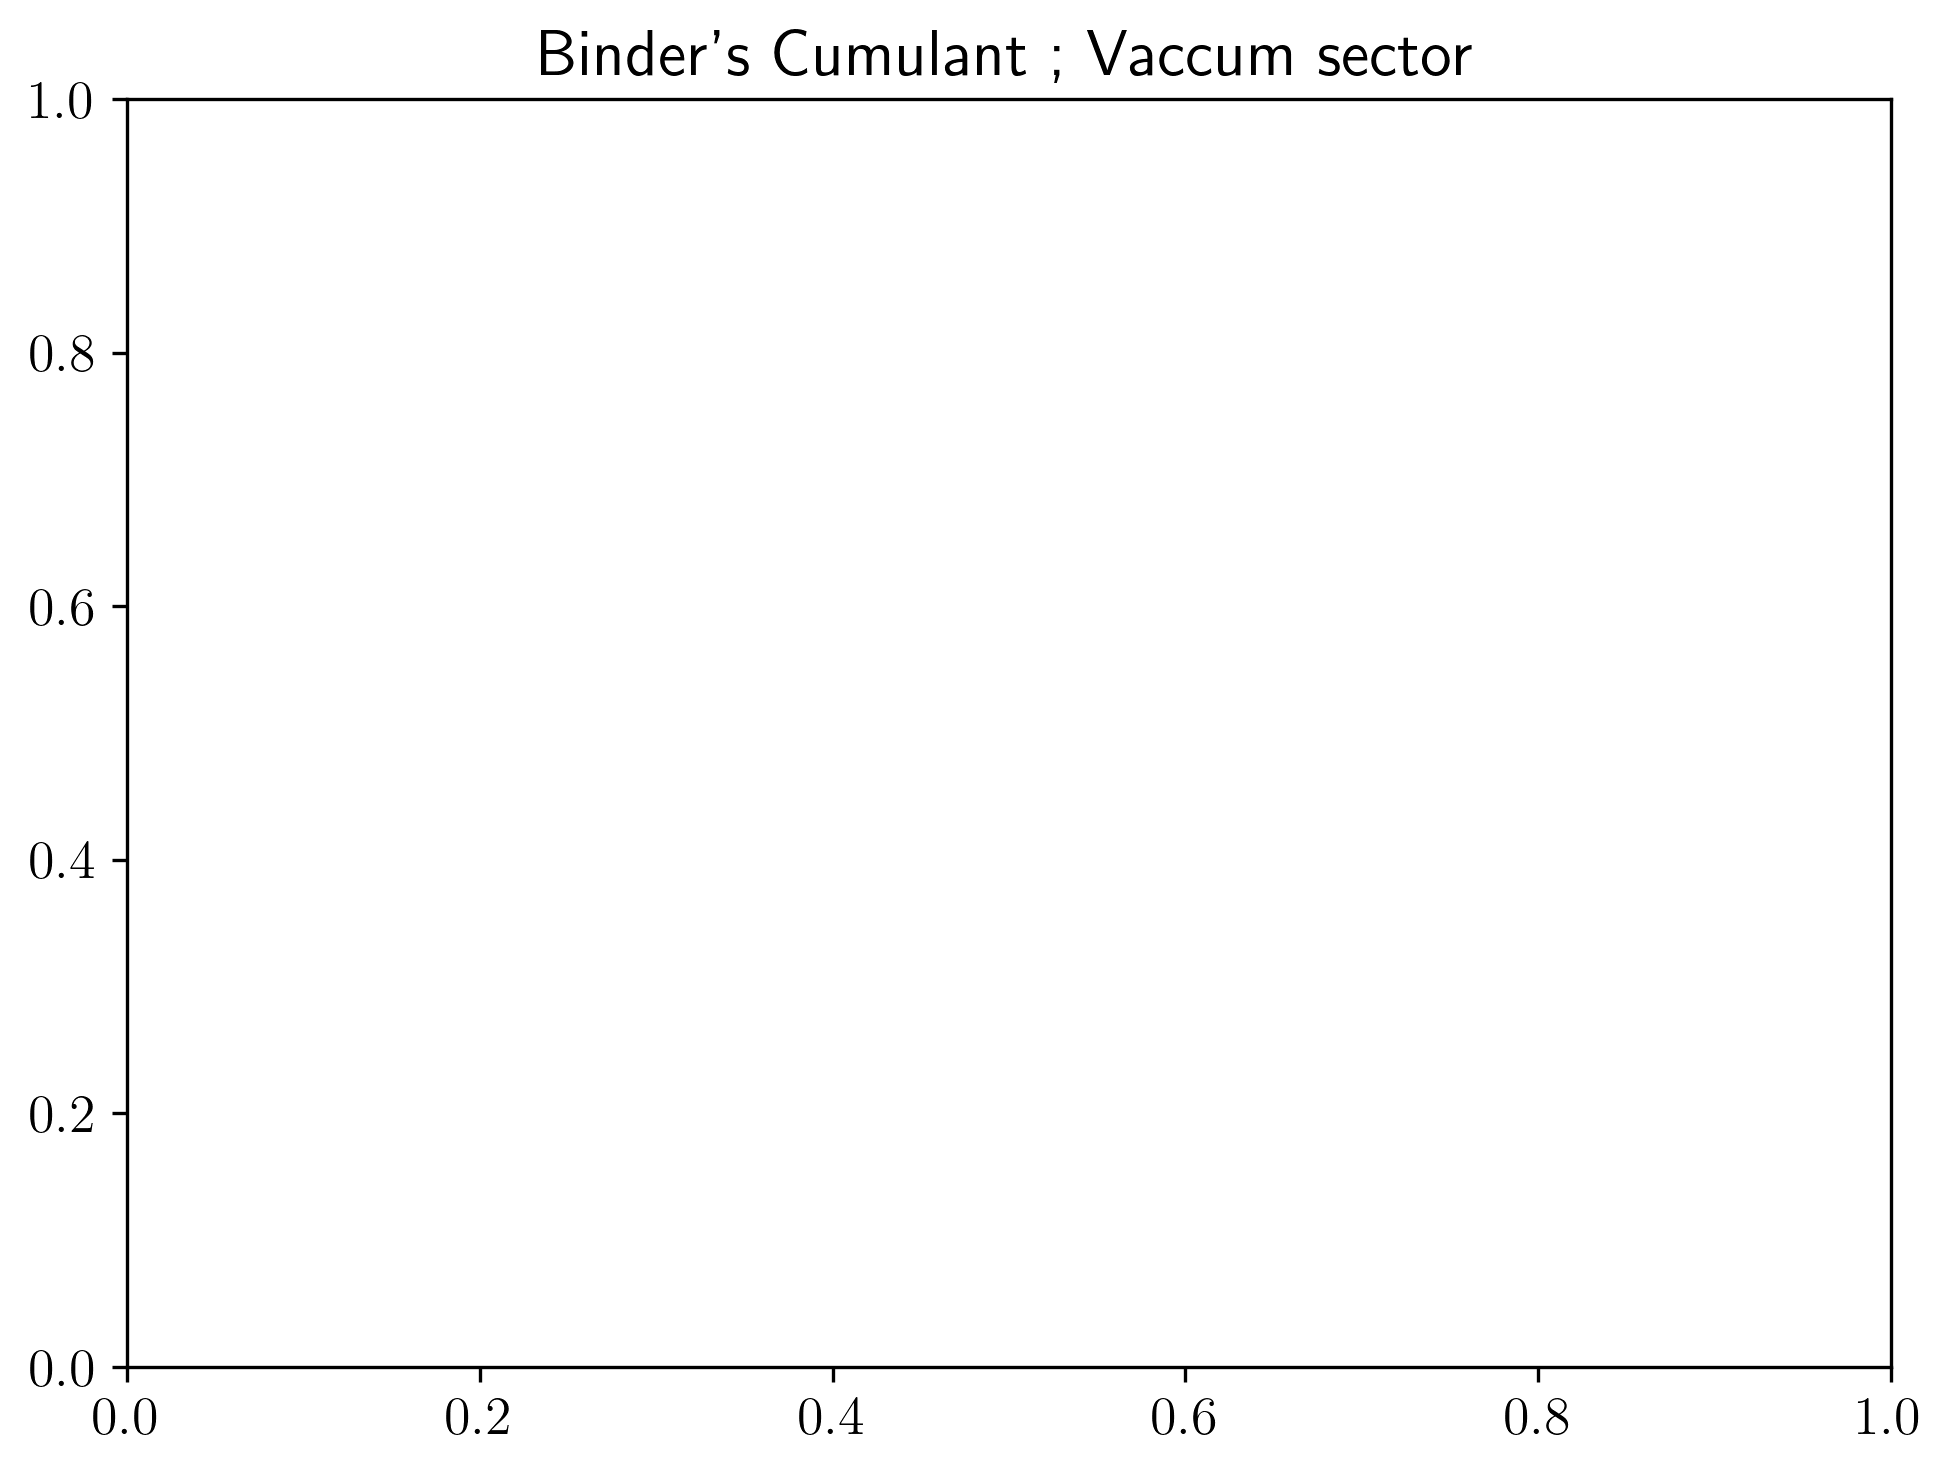

In [21]:
from qs_mps.utils import  binders_cumul
Ls = [4,5]
chis = [64,128]
ss = [1,1]
plt.title("Binder's Cumulant ; Vaccum sector")
hs = np.linspace(2,6,20)
for L, chi, s in zip(Ls, chis, ss):
    string4 = np.load(f"/Users/fradm98/Library/CloudStorage/GoogleDrive-fra.di.marcantonio@gmail.com/My Drive/projects/1_Z2/results/mag_data/dual_mag_fourth_moment_Z2_dual_direct_lattice_{L}x{L}_vacuum_sector_None-None_h_2.0-6.0_delta_20_chi_{chi}.npy")
    string2 = np.load(f"/Users/fradm98/Library/CloudStorage/GoogleDrive-fra.di.marcantonio@gmail.com/My Drive/projects/1_Z2/results/mag_data/dual_mag_second_moment_Z2_dual_direct_lattice_{L}x{L}_vacuum_sector_None-None_h_2.0-6.0_delta_20_chi_{chi}.npy")
    print(string4)
    ub = binders_cumul(fourth_m=string4, sm=string2)
    print(ub)
    plt.plot(hs, ub, '+-', linewidth=0.6, label=f"{L}x{L}")
    # plt.plot(hs, string2, '+-', linewidth=1, label=f"{L}x{L}")
# L = 6
# chi = 128
# string4 = np.load(f"/Users/fradm98/Library/CloudStorage/GoogleDrive-fra.di.marcantonio@gmail.com/My Drive/projects/1_Z2/results/thooft/thooft_string_fourth_moment_{s}-1_horizontal_Z2_dual_direct_lattice_{L}x{L}_vacuum_sector_None-None_h_2.0-6.0_delta_50_chi_{chi}.npy")
# string2 = np.load(f"/Users/fradm98/Library/CloudStorage/GoogleDrive-fra.di.marcantonio@gmail.com/My Drive/projects/1_Z2/results/thooft/thooft_string_second_moment_{s}-1_horizontal_Z2_dual_direct_lattice_{L}x{L}_vacuum_sector_None-None_h_2.0-6.0_delta_50_chi_{chi}.npy")
# ub = binders_cumul(fourth_m=string4, sm=string2)
# hs = np.linspace(2,6,50)
# plt.plot(hs, ub, '+-', linewidth=0.6, label=f"{L}x{L}")
plt.legend()
plt.show()

In [10]:
from qs_mps.mps_class import MPS
from qs_mps.utils import get_precision, tensor_shapes
L = 6
l = 5
d = 2**l
model = "Z2_dual"
chi = 128
h_i = 2
h_f = 6
npoints = 20
hs = np.linspace(h_i,h_f,npoints)
charges_x = None
charges_y = None
num = (h_f - h_i) / npoints
precision = get_precision(num)
path_tensor = "/Users/fradm/Desktop/projects/1_Z2"
sites = [2]
ladders = [1]
direction = "horizontal"

S = []
for h in hs:
    lattice_mps = MPS(L=L, d=d, model=model, chi=chi, h=h)
    lattice_mps.L = lattice_mps.L - 1

    lattice_mps.load_sites(path=path_tensor, precision=precision, cx=charges_x, cy=charges_y)
    print(tensor_shapes(lattice_mps.sites, print=False)[lattice_mps.L//2])

FileNotFoundError: /Users/fradm/Desktop/projects/1_Z2/results/tensors/shapes_sites_Z2_dual_direct_lattice_5x5_None-None_chi_128_h_2.0 not found.

In [22]:
a = np.load("/Users/fradm98/Library/CloudStorage/GoogleDrive-fra.di.marcantonio@gmail.com/My Drive/projects/1_Z2/results/mag_data/dual_mag_second_moment_Z2_dual_direct_lattice_4x4_vacuum_sector_None-None_h_2.0-6.0_delta_20_chi_64.npy")
print(a)

[]
